In [1]:
from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import argparse

import cv2

import os
from sklearn.utils import shuffle
from tqdm import tqdm

import numpy as np


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset',
        target_size=(370, 370),
        batch_size=924,
        shuffle=False
        )



Found 922 images belonging to 2 classes.


In [4]:
X_train, y_train = next(train_generator)
print(len(X_train))
len(y_train)

922


922

(370, 370, 3)


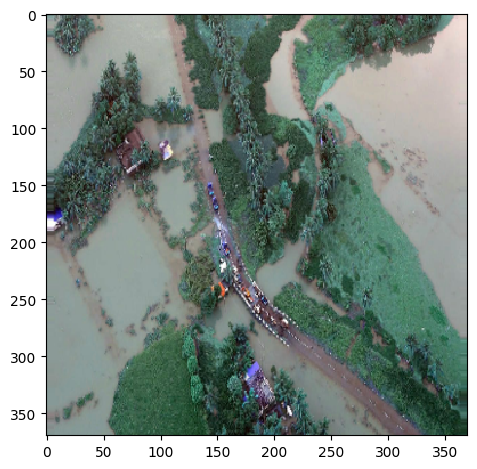

In [5]:

resizedimgs=X_train
label_names=train_generator.labels
resizedimgs, label_names = shuffle(resizedimgs, label_names)
from skimage import io

io.imshow(resizedimgs[0])
# io.imshow(resizedimgs[1])
# io.imshow(resizedimgs[2])
# io.imshow(resizedimgs[3])
# io.imshow(resizedimgs[4])
# io.imshow(resizedimgs[5])
# io.imshow(resizedimgs[6])
# io.imshow(resizedimgs[7])
label_names[0:10]
print(resizedimgs[2].shape)


In [12]:
from skimage.color import rgb2gray
grey_images=[]
for i in resizedimgs:
  grey_images.append(rgb2gray(i))

In [13]:
grey_images[0].shape

(370, 370)

In [15]:
features=[]
for i in grey_images:
  features.append(np.reshape(i, (370*370)))

print(np.array(features).shape)



(922, 136900)


In [7]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [16]:
# import pandas as pd
# X = pd.DataFrame(features)
# y = pd.Series(label_names)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label_names,
                                                    test_size=.2,
                                                    random_state=142)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

1    370
0    367
dtype: int64

In [17]:
svm = SVC()

# fit model
svm.fit(X_train, y_train)

SVC()

In [18]:
from sklearn.metrics import classification_report
print(len(X_test))
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))


185
Model accuracy is:  0.6756756756756757
              precision    recall  f1-score   support

           0       0.64      0.81      0.72        94
           1       0.73      0.54      0.62        91

    accuracy                           0.68       185
   macro avg       0.69      0.67      0.67       185
weighted avg       0.69      0.68      0.67       185



In [21]:
feature_matrix_image = np.zeros((922,370,370)) 
feature_matrix_image

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
for k in range(0,922) :
  for i in range(0,resizedimgs[k].shape[0]):
  
      for j in range(0,resizedimgs[k].shape[1]):
  
          feature_matrix_image[k][i][j] = (((resizedimgs[k][i,j,0]) + (resizedimgs[k][i,j,1]) + (resizedimgs[k][i,j,2]))/3)


In [37]:
feature_matrix_image.shape


(922, 370, 370)

In [41]:
feature_sample = np.reshape(feature_matrix_image, (922,370*370)) 
 
feature_sample.shape

(922, 136900)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(feature_sample,
                                                    label_names,
                                                    test_size=.2,
                                                    random_state=142)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

1    370
0    367
dtype: int64

In [43]:
svm = SVC()

# fit model
svm.fit(X_train, y_train)

SVC()

In [44]:
from sklearn.metrics import classification_report
print(len(X_test))
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))


185
Model accuracy is:  0.7027027027027027
              precision    recall  f1-score   support

           0       0.66      0.86      0.75        94
           1       0.79      0.54      0.64        91

    accuracy                           0.70       185
   macro avg       0.72      0.70      0.69       185
weighted avg       0.72      0.70      0.69       185

